In [26]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [49]:
data_files = {'S14':[5000, '/beegfs/desy/user/kimyoon/S14_r112_p_only_0001_cen2bst/prtf_v4_S14_r112_p_only_0001_cen2bst_4series_best20.mat'],
             'S15': [10000,'/beegfs/desy/user/kimyoon/S15_r112_p_only_0002_cen2bst/prtf_v4_S15_r112_p_only_0002_cen2bst_4series_best20.mat'],
             'S16': [20000, '/beegfs/desy/user/kimyoon/S16_r112_p_only_0001_cen2bst/prtf_v4_S16_r112_p_only_0001_cen2bst_4series_best20.mat'],
             'S17': [40000, '/beegfs/desy/user/kimyoon/S17_r112_p_only_0001_cen2bst/prtf_v4_S17_r112_p_only_0001_cen2bst_4series_best20.mat']}

data_files_AGIPD = {'S14':[5000, '/beegfs/desy/user/kimyoon/S14_r112_poission_AGIPD_0001_cen2bst/prtf_v4_S14_r112_poission_AGIPD_0001_cen2bst_4series_best20.mat'],
             'S15':[10000, '/beegfs/desy/user/kimyoon/S15_r112_poission_AGIPD_0001_cen2bst/prtf_v4_S15_r112_poission_AGIPD_0001_cen2bst_4series_best20.mat'],
             'S16':[20000, '/beegfs/desy/user/kimyoon/S16_r112_poission_AGIPD_0001_cen2bst/prtf_v4_S16_r112_poission_AGIPD_0001_cen2bst_4series_best20.mat'],
             'S17': [40000, '/beegfs/desy/user/kimyoon/S17_r112_poission_AGIPD_0001_cen2bst/prtf_v4_S17_r112_poission_AGIPD_0001_cen2bst_4series_best20.mat']}

In [54]:
# Plotting Style Setup
plt.style.use(['science','notebook'])
# fig_w = 3.5
# fig_h = 2.625
# fig_w = 3.3
# fig_h = 2.7
fig_w = 7
fig_h = 5.25

size_scale = np.sqrt(fig_w*fig_h/(3.5*2.625))
lablesize = 16 * size_scale
plt.rcParams.update({
    "axes.labelsize": lablesize,
    "legend.fontsize": 0.6*lablesize,
    "xtick.labelsize": 0.875*lablesize, 
    "ytick.labelsize": 0.875*lablesize,
    "legend.title_fontsize" : lablesize,
    "axes.titlesize": lablesize,})          # specify font size here

# plt.rcParams["axes.prop_cycle"] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
my_cycle = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'
                            ]) + cycler(linestyle=['-', '--', ':', '-.'])

plt.rcParams["axes.prop_cycle"] = my_cycle


def plotPTFS(data_files, name, ax):
    fn = data_files[name][1]
    nframes = data_files[name][0]
    with h5py.File(fn,'r') as h5:
        refl = np.squeeze(h5['refl'][()])
#         figure, ax = plt.subplots(figsize=(fig_w,fig_h))
        ax.plot(range(len(refl)),refl,label=str(nframes));
#         plt.axhline(y=1/np.exp(1), color='r', linestyle=':', lw=3)
#         ax.plot(threshold_main[0:r_max_1], color='r', lw=3, ls=':');

#         plt.xlabel('Half period resolution (nm)');
#         plt.ylabel('PTFS')
#         ax.set_ylim(bottom=0)
#         ax.set_xticks([16,53,80,106,138])
#         ax.set_xticklabels(['10.0', '3.0','2.0','1.5','1.15'])
#         plt.title(f'nframes = {nframes}')
#         pdf_name = 'PTFS_{}.pdf'.format(name.replace(' ', '_'))
#         plt.savefig(pdf_name,dpi=300)     
        

def plotPTFS_in_one(data_files, title):
    figure, ax = plt.subplots(figsize=(fig_w,fig_h))
    for key in data_files.keys():
        plotPTFS(data_files, key, ax)
    plt.xlabel('Half period resolution (nm)');
    plt.ylabel('PTFS')
    ax.set_ylim(bottom=0)
    ax.set_xticks([16,53,80,106,133])
    ax.set_xticklabels(['10.0', '3.0','2.0','1.5','1.2'])
    plt.legend()
#     plt.title(title)
    pdf_name = 'PTFS_{}.pdf'.format(title)
    plt.savefig(pdf_name,dpi=300)        
    
def plotPTFS_compare(data_poisson, data_agipd,key,title):
    figure, ax = plt.subplots(figsize=(fig_w,fig_h))
    plotPTFS(data_poisson, key, ax)
    plotPTFS(data_agipd, key, ax)
    plt.axhline(y=1/np.exp(1), color='r', linestyle=':', lw=3)
    plt.xlabel('Half period resolution (nm)');
    plt.ylabel('PTFS')
    ax.set_ylim(bottom=0)
    ax.set_xticks([16,53,80,106,133])
    ax.set_xticklabels(['10.0', '3.0','2.0','1.5','1.2'])
    plt.legend(['Poisson only','Poisson + AGIPD'])
    plt.title(title)
    pdf_name = 'PTFS_{}.pdf'.format(title)
    plt.savefig(pdf_name,dpi=300)        

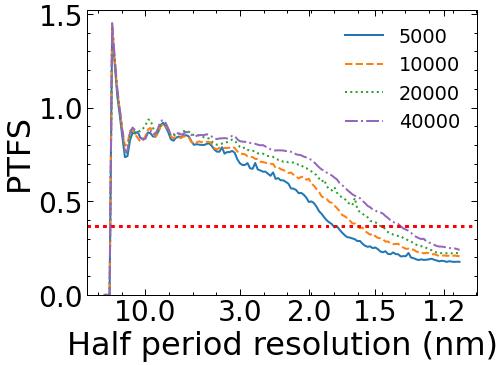

In [47]:
plotPTFS_in_one(data_files,'Poission')

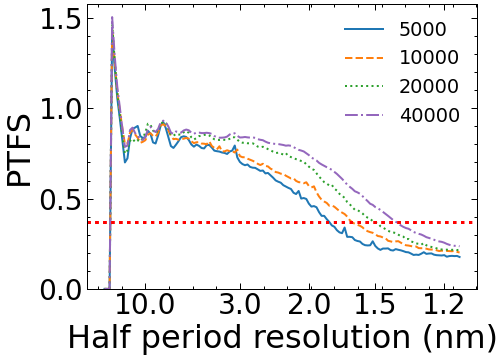

In [48]:
plotPTFS_in_one(data_files_AGIPD,'Poission+AGIPD')

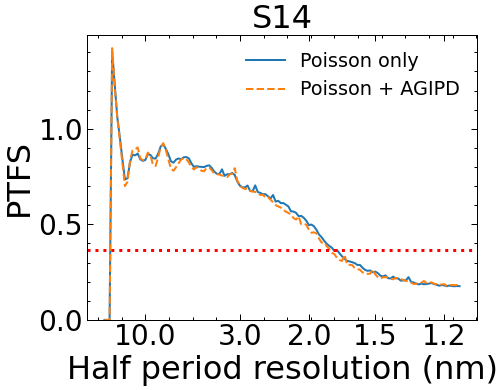

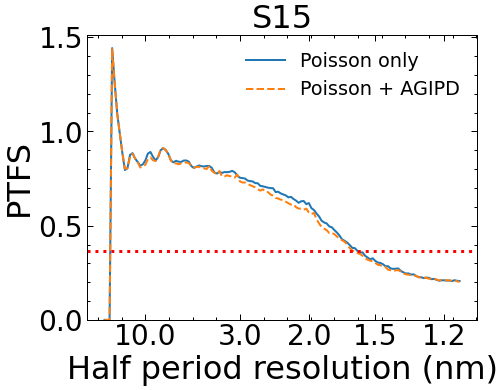

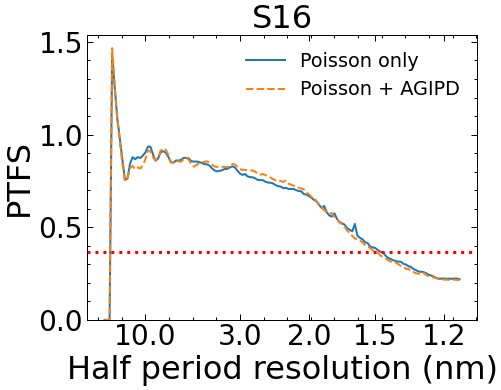

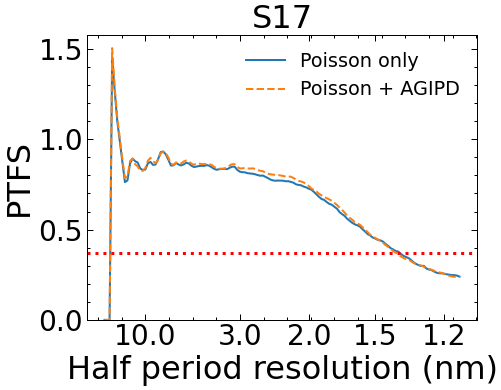

In [58]:
plotPTFS_compare(data_files, data_files_AGIPD,'S14', 'S14')
plotPTFS_compare(data_files, data_files_AGIPD,'S15', 'S15')
plotPTFS_compare(data_files, data_files_AGIPD,'S16', 'S16')
plotPTFS_compare(data_files, data_files_AGIPD,'S17', 'S17')

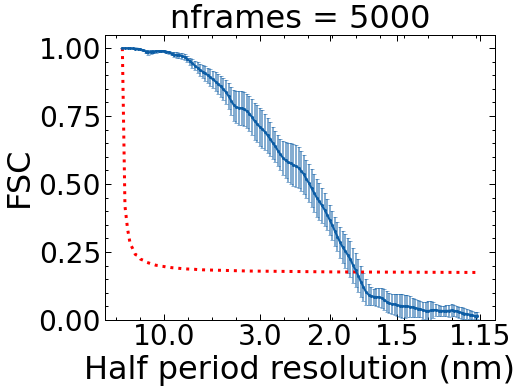

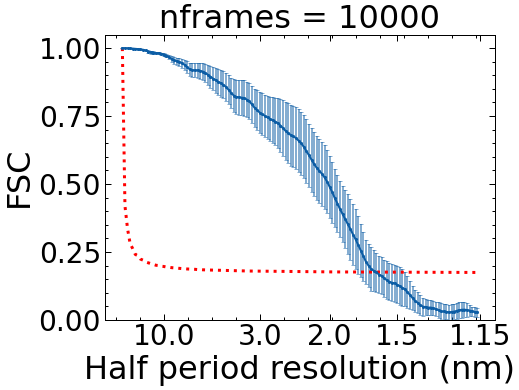

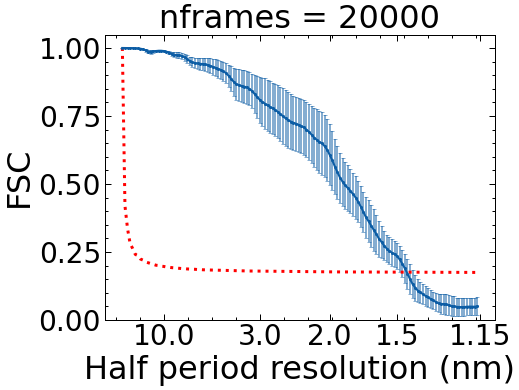

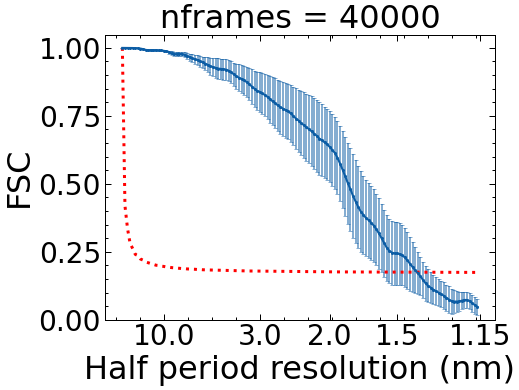

In [65]:
# fn = '/beegfs/desy/user/kimyoon/S14_r112_p_only_0001_cen2bst/fsc_cross_avg_S14_r112_p_only_0001_cen2bst_4series_avg20.mat'
plotFSC('S14')
plotFSC('S15')
plotFSC('S16')
plotFSC('S17')